<a href="https://colab.research.google.com/github/frm1789/Portfolio/blob/main/PCA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA Application


* Grasp the fundamental linear algebra techniques which are used to compute PCA.
* Utilize NumPy to transition your newly gained mathematical knowledge into code.
* Apply scikit-learn’s PCA and learn about its nuances while using it.
* Understand the benefits of dimensionality reduction and the trade-off between speed and accuracy.


# Project outline

This project is divided into 3 milestones.

1. Computing eigenvalues and eigenvectors
Estimated duration: 1-2 hours

2. Implementation of PCA and Logistic Regression
Estimated duration: 1.5 -2 hours

3. Plot, analyze, and compare results
Estimated duration: 3.5-4 hours

# Part I: Milestone

This `Jupyter Notebook` is the starter notebook for the second milestone of the project <b>Principal Component Analysis</b>. It consists of the following tasks:

- Implementation of the covariance matrix and eigendecomposition in the custom PCA class.
- Prepare data for training: train/test-split and normalization of the dataset.
- Implement logistic regression with [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression) and validate its accuracy.

In [1]:
# standard imports
import numpy as np


# sklearn
import sklearn
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# other useful imports
from importlib import reload
from time import time


# imports for plotting
import matplotlib.pyplot as plt


#ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# change data_home path where you wnat to store the data
# important: as_frame needs to be set as False otherwise we would get a data frame
# and would have to convert the dataset to numpy arrays later on
mnist = fetch_openml('mnist_784', data_home='data/', as_frame=False)

In [3]:
# the dataset is split into the images and the labels
# we expect values between 0 and 255 for images
print('Images shape: ', mnist.data.shape)
print('Images range: ', mnist.data.min(), ' - ', mnist.data.max(), 'pixel')
print('Labels shape: ', mnist.target.shape)

Images shape:  (70000, 784)
Images range:  0.0  -  255.0 pixel
Labels shape:  (70000,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [5]:

# check the split
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 784)
y_train: (60000,)
x_test:  (10000, 784)
y_test:  (10000,)


 from
 https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib

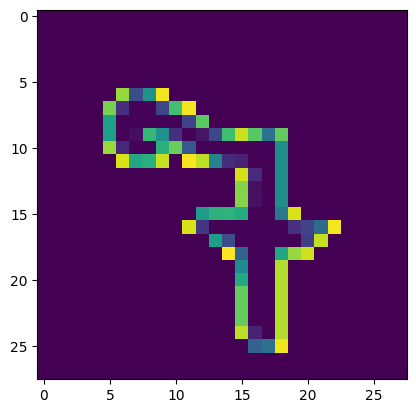

In [6]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

# Get a batch of two random images and show in a pop-up window.
gen_image(x_train[0]).show()


In [7]:
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  40. 195. 126.   6.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

#### Normalize the data 
By dividing by 255

### How to NOT normalize a dataset?

In [8]:
x_train  = np.array(x_train)/255
x_test = np.array(x_test)/255

In [9]:
print(x_train[:,10])

[0. 0. 0. ... 0. 0. 0.]


In [10]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min()) 
x_test = (x_test - x_train.min())/(x_train.max() - x_train.min())  

In [11]:
print(x_train[:,10])

[0. 0. 0. ... 0. 0. 0.]


# Implement LG 

From scikit learn to classify images without any modification via PCA and evaluation accuracy.

In [12]:
start = time()

lreg = LogisticRegression(solver='lbfgs')
lreg.fit(x_train, y_train)
pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)


In [13]:
accuracy = accuracy_score(y_train, pred_train)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.9363166666666667


In [14]:
accuracy = accuracy_score(y_test, pred_test)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.9196


In [15]:
end = time()

running_time = end-start
print('Time to fit: {}s'.format(running_time))

Time to fit: 45.71583271026611s


# Part II: Milestone

It consists of the following tasks:

- Use sklearn's `explained_variance_ratio_`to determine the number of components needed for a given threshold.
- Use the `explained_variance_ratio_` function to plot the cumulative explained variance ratio.

- Use the `variance_explained` function to plot the first digit of the dataset with different thresholds.
- Compare the running time of the logistic regression with and without PCA.
- Compare the accuracy between the prediction with and without PCA. 

In [16]:
mnist = fetch_openml('mnist_784', data_home='data/', as_frame=False)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, train_size= 0.8, test_size=0.2, random_state=0)

In [18]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min()) 
x_test = (x_test - x_train.min())/(x_train.max() - x_train.min()) 

In [19]:
print(mnist.data.max()) 
print(mnist.data.min())

255.0
0.0


In [20]:
print(x_train.max()) 
print(x_train.min())

1.0
0.0


In [21]:
print(x_test.max()) 
print(x_test.min())

255.0
0.0


In [22]:
start = time()
#‘lbfgs’ solver handles multinomial loss in multiclass problems 
log_normal = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
end = time()

time_log_normal = end-start
print('Time to fit: {}s'.format(time_log_normal))

Time to fit: 40.95360732078552s


In [23]:
y_pred_train = log_normal.predict(x_train)
y_pred_test = log_normal.predict(x_test)


In [24]:
log_normal_score_train = accuracy_score(y_train, y_pred_train)
log_normal_score_test = accuracy_score(y_test, y_pred_test)

In [25]:
# Evaluation
print('Training Set Score: {}'.format(log_normal_score_train.round(4)))
print('Test Set Score: {}'.format(log_normal_score_test.round(4)))

Training Set Score: 0.9369
Test Set Score: 0.8604


In [26]:
pca = PCA(n_components=100) 
pca.fit(x_train)

PCA(n_components=100)

#### Determining the number of Principal Components

Sklearn provides a function where we can access the [percentage of variance explained](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) by each of the selected components. We can use this to calculate the number of components we will have for instanace for having an explained variance of 90%. 

-  **np.cumsum en NumPy** se utiliza para calcular la suma acumulativa de los elementos de un array. 
- **pca.explained_variance_ratio_**, que es un array que contiene las proporciones de varianza explicada por cada componente principal en PCA


In [27]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

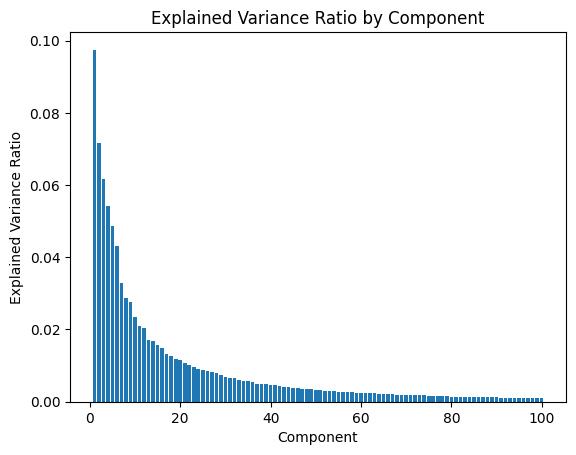

In [28]:
# Create a bar plot
n_components = len(pca.explained_variance_ratio_)
components = np.arange(1, n_components + 1)
plt.bar(components, pca.explained_variance_ratio_)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Component')
plt.show()

In [29]:
threshold=0.90 # set the threshold to desired amount
r = [np.argmax(cum_sum > threshold) + 1][0] # get the number of ideal r
PC = (cum_sum[r-1]) # get the value of the optimal PC
print('The smallest number of PCs retaining {}% of variance is reached with {} components'.format(threshold,r))

The smallest number of PCs retaining 0.9% of variance is reached with 87 components


In [30]:
def variance_explained_plot(ratio):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(range(1, len(ratio) + 1), np.cumsum(ratio), color='r', label='Cumulative Explained Variance Ratio')
    ax.axhline(y=0.95, color='k', linestyle='--', label='95% Explained Variance')
    ax.axhline(y=0.90, color='c', linestyle='--', label='90% Explained Variance')
    ax.axhline(y=0.85, color='grey', linestyle='--', label='85% Explained Variance')
    ax.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
    ax.set_ylabel('Cumulative Sum of Explained Variance Ratio', fontsize=14)
    ax.set_xlabel('Number of Components', fontsize=14)
    plt.legend(loc=0);

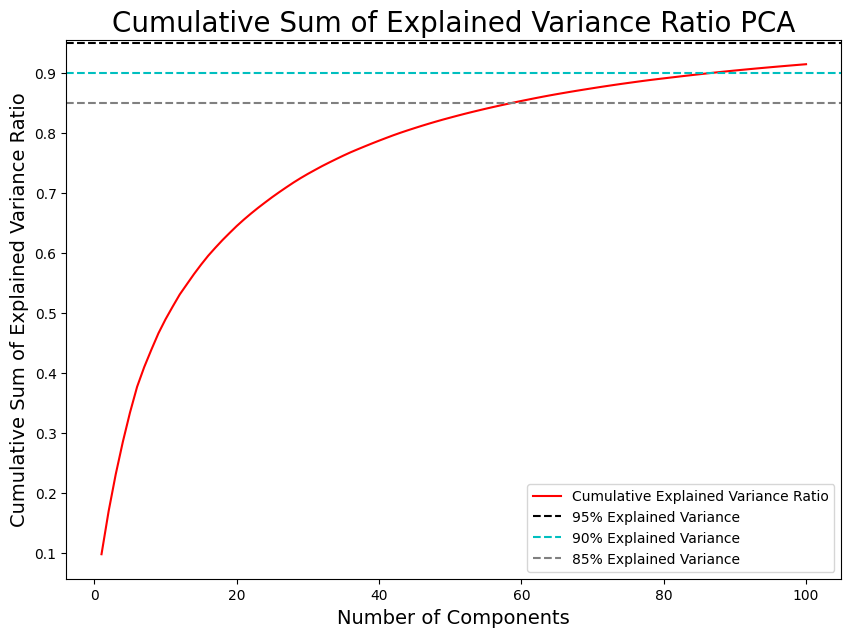

In [31]:
ratio = pca.explained_variance_ratio_
variance_explained_plot(ratio)

In [47]:
def variance_explained(percent, images): 
    # percent of variance | float from 0 to 1 
    pca = PCA(percent) # Instance of PCA object
    pca.fit(images)    # Adjust the PCA model to the images.
    components = pca.transform(images)              # Transform original images to PCA 
    approx = pca.inverse_transform(components)      
    return approx

Use the `variance_explained` function, which is provided for you above to plot the first digit of the MNIST training dataset and the different thresholds:
- Orignal image (784 components)
- 95% of explained variance
- 90% of explained variance
- 85% of explained variance

You can use the `show_images` function from milestone 2, which can be found here: `customlib/plotting.py` as an example how to plot images.

In [33]:
plt.rcParams['axes.grid'] = False # don't use grid for image plots

In [43]:
def explained_variance_plot(x_train):
    
    ranges = [2, 3, 4] # ranges for subplots
    percentages = [0.95, 0.90, 0.85] # diffrent percentages
    components_ = [154, 87, 59] # number of different components
    
    
    # plot first original image, with no PCA used
    plt.subplot(1, 4, 1);
    plt.imshow(x_train[0].reshape(28,28),
                  cmap = plt.cm.binary_r);
    plt.xlabel('784 Components', fontsize = 8)
    plt.title('Original Image', fontsize = 8);
    
    

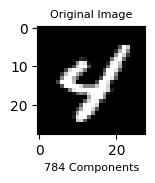

In [44]:
explained_variance_plot(x_train)

In [45]:
def explained_variance_plot(x_train):
    
    ranges = [2, 3, 4] # ranges for subplots
    percentages = [0.95, 0.90, 0.85] # diffrent percentages
    components_ = [154, 87, 59] # number of different components
    
    
    # plot first original image, with no PCA used
    plt.subplot(1, 4, 1); #row #columns # position of the plot that I am creating.
    plt.imshow(x_train[0].reshape(28,28),
                  cmap = plt.cm.viridis); # paleta de colores: cmap = plt.cm.binary_r
    plt.xlabel('784 Components', fontsize = 8)
    plt.title('Original Image', fontsize = 8);


# loop over the subplots
    for range_, percent, components in zip(ranges, percentages, components_):
        plt.subplot(1, 4, range_);
        plt.imshow(variance_explained(percent, x_train)[0].reshape(28, 28),
              cmap = plt.cm.viridis);
        plt.xlabel('{} Components'.format(components), fontsize = 8)
        plt.title('{}% of Explained Variance'.format(percent), fontsize = 8);

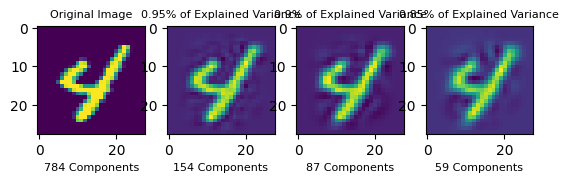

In [48]:
explained_variance_plot(x_train)

## Compare the running time of the logistic regression with and without PCA.

In [50]:
start = time()
pca = PCA(0.9).fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

end = time()
time_pca = end-start

#print(x_train_pca.shape, x_test_pca.shape)
print(time_pca)

12.106742858886719


In [51]:
def time_plot(start, end, x_train_pca):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.bar(0, time_log_normal, width=0.5)
    ax.bar(1, end-start, width=0.5)
    ax.set_xlabel('Model')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Full Dataset', '{} PCs'.format(x_train_pca.shape[1])])
    ax.set_ylabel('Time in s')
    ax.set_title('Time (s) taken to fit the two models');

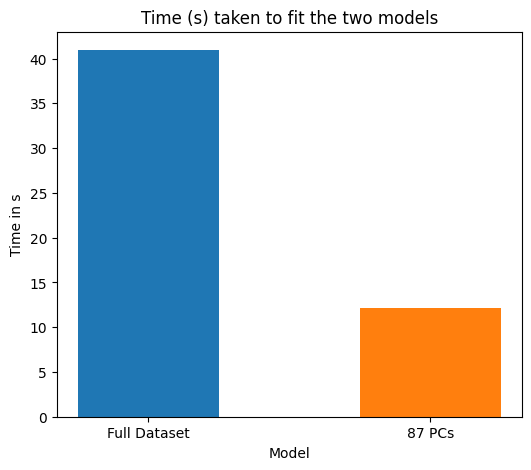

In [52]:
time_plot(start, end, x_train_pca)

Time to fit logistic regression with (87 PCs): 12.987235069274902s
Time to fit logistic regression on the full dataset: 40.95360732078552s
Hence, to fit the logistic regression with the reduced dataset is about 3.2 times faster than without using PCA
Time for PCA:  12.106742858886719
Combined time for PCA and logistic regression: 25.09397792816162s
Which results in a total speed-up of 1.6.


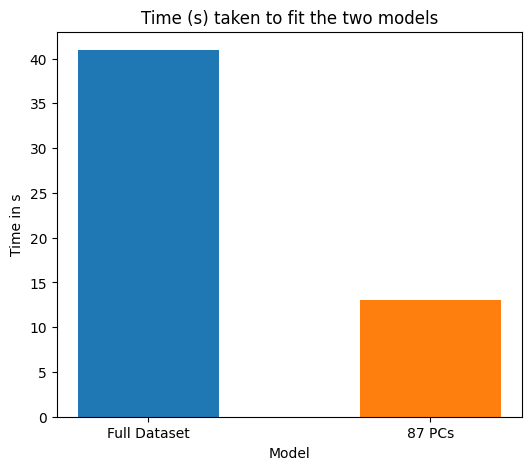

In [53]:
start = time()
log_pca = LogisticRegression(solver='lbfgs').fit(x_train_pca, y_train)
end = time()

log_pca_time = (end-start) + time_pca

print('Time to fit logistic regression with ({} PCs): {}s'.format(x_train_pca.shape[1],end-start))
print('Time to fit logistic regression on the full dataset: {}s'.format(time_log_normal))
print('Hence, to fit the logistic regression with the reduced dataset is about', np.round(time_log_normal/(end-start),1), 'times faster than without using PCA')
print('Time for PCA: ', time_pca)
print('Combined time for PCA and logistic regression: {}s'.format(log_pca_time))
print('Which results in a total speed-up of {}.'.format(np.round(time_log_normal/(log_pca_time),1)))


time_plot(start, end, x_train_pca)

## Compare the accuracy between prediction with/without PCA 

In [54]:
y_preds_train_pca = log_pca.predict(x_train_pca)
y_preds_test_pca = log_pca.predict(x_test_pca)

model_score_train_pca = accuracy_score(y_train, y_preds_train_pca)
model_score_test_pca = accuracy_score(y_test, y_preds_test_pca)

# Evaluaiton
print('Training Set Score: {}'.format(model_score_train_pca.round(4)))
print('Test Set Score: {}'.format(model_score_test_pca.round(4)))

print('Training Set Score of the full dataset: {}'.format(log_normal_score_train.round(4)))
print('Test Set Score of the full dataset: {}'.format(log_normal_score_test.round(4)))

Training Set Score: 0.9225
Test Set Score: 0.8503
Training Set Score of the full dataset: 0.9369
Test Set Score of the full dataset: 0.8604
